In [3]:
import pandas as pd
df=pd.read_csv("ViewingActivity.csv")
df.shape

(1261, 10)

In [4]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Guest,2022-12-17 18:56:29,00:00:08,Autoplayed: user action: None;,FRACTURED_CLIP_CLIFFHANGER,HOOK,Chrome PC (Cadmium),00:00:08,00:00:08,IN (India)
1,Guest,2022-12-17 18:49:56,00:03:37,NaN,Beast of Bangalore: Indian Predator: Limited S...,NaN,Chrome PC (Cadmium),00:03:47,00:03:47,IN (India)
2,Guest,2022-12-17 18:10:23,00:00:32,NaN,Don't Look Up,NaN,Chrome PC (Cadmium),00:00:32,00:00:32,IN (India)
3,Guest,2022-12-17 18:07:13,00:00:13,NaN,Don't Look Up,NaN,Chrome PC (Cadmium),00:00:00,Not latest view,IN (India)
4,Guest,2022-12-17 18:06:14,00:00:12,Autoplayed: user action: None;,Codename: Tiranga (fka Durga)_hook_05_16x9,HOOK,Chrome PC (Cadmium),00:00:12,00:00:12,IN (India)


In [5]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)

,Start Time,Duration,Title
0,2022-12-17 18:56:29,00:00:08,FRACTURED_CLIP_CLIFFHANGER


In [6]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [7]:
df['Start Time'] = pd.to_datetime(df['Start Time'],utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [8]:
df=df.set_index("Start Time") #Setting Start time as index as tz_convert can only
df.index=df.index.tz_convert("Asia/Kolkata") #Be used on index
df=df.reset_index() #Converting back to narmal column
df.head()

,Start Time,Duration,Title
0,2022-12-18 00:26:29+05:30,00:00:08,FRACTURED_CLIP_CLIFFHANGER
1,2022-12-18 00:19:56+05:30,00:03:37,Beast of Bangalore: Indian Predator: Limited S...
2,2022-12-17 23:40:23+05:30,00:00:32,Don't Look Up
3,2022-12-17 23:37:13+05:30,00:00:13,Don't Look Up
4,2022-12-17 23:36:14+05:30,00:00:12,Codename: Tiranga (fka Durga)_hook_05_16x9


In [9]:
df["Duration"]=pd.to_timedelta(df["Duration"])
df.dtypes

Start Time    datetime64[ns, Asia/Kolkata]
Duration                   timedelta64[ns]
Title                               object
dtype: object

In [10]:
pr=df[df["Title"].str.contains("Parasyte:", regex=False)]
pr.sample(20)

,Start Time,Duration,Title
147,2023-01-01 22:44:20+05:30,0 days 00:10:37,Parasyte: The Maxim: Season 1: Something Wicke...
194,2022-12-30 19:58:00+05:30,0 days 00:12:37,Parasyte: The Maxim: Season 1: The Selfish Gen...
291,2022-12-26 17:52:11+05:30,0 days 00:20:09,Parasyte: The Maxim: Season 1: A Dark Night's ...
287,2022-12-26 18:20:36+05:30,0 days 00:05:53,Parasyte: The Maxim: Season 1: Freezing Point ...
196,2022-12-30 19:32:38+05:30,0 days 00:00:57,Parasyte: The Maxim: Season 1: Hello Sadness (...
83,2023-01-05 15:18:04+05:30,0 days 00:13:53,Parasyte: The Maxim: Season 1: Life and Vows (...
389,2022-12-24 18:52:23+05:30,0 days 00:01:18,Parasyte: The Maxim: Season 1_hook_01_16x9
259,2022-12-27 18:42:06+05:30,0 days 00:01:24,Parasyte: The Maxim: Season 1: What Mad Univer...
113,2023-01-03 11:04:25+05:30,0 days 00:20:04,Parasyte: The Maxim: Season 1: More Than Human...
195,2022-12-30 19:37:38+05:30,0 days 00:19:02,Parasyte: The Maxim: Season 1: Hello Sadness (...


In [11]:
pr=pr[(pr["Duration"] > "0 days 00:01:00")]
pr.sample()

,Start Time,Duration,Title
321,2022-12-26 16:06:45+05:30,0 days 00:05:36,Parasyte: The Maxim: Season 1: The Stranger (E...


In [12]:
pr["Duration"].sum()

Timedelta('0 days 07:46:57')

In [13]:
pr["Weekday"]=pr["Start Time"].dt.weekday
pr["Hour"]=pr["Start Time"].dt.hour
pr.head(1)

,Start Time,Duration,Title,Weekday,Hour
68,2023-01-06 20:31:19+05:30,0 days 00:08:08,Parasyte: The Maxim: Season 1: Parasitic Beast...,4,20


In [14]:
import matplotlib
%matplotlib inline

<Axes: title={'center': 'Parasyte watched by day'}>

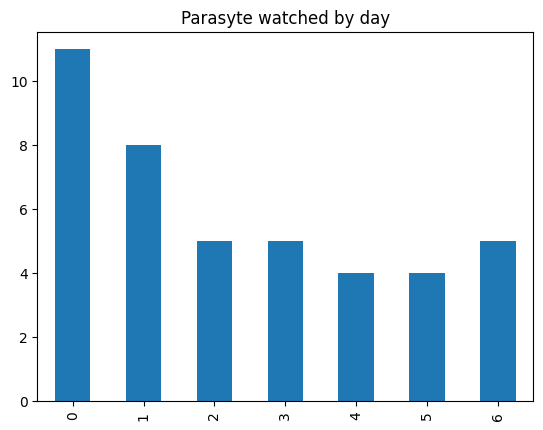

In [15]:
pr["Weekday"]=pd.Categorical(pr["Weekday"],categories=[0,1,2,3,4,5,6],ordered=True)
#Set our categorical and define order so days are plotted Monday-Sunday
#create pr_day and count the rows for each weekday assigning result to variable
pr_day=pr["Weekday"].value_counts()
pr_day=pr_day.sort_index()
#Sort the columns using the categorical i.e maonday(0) is first and sunday(6) is last
pr_day.plot(kind='bar',title="Parasyte watched by day")

<Axes: title={'center': 'Parasyte episodes watched by hour'}>

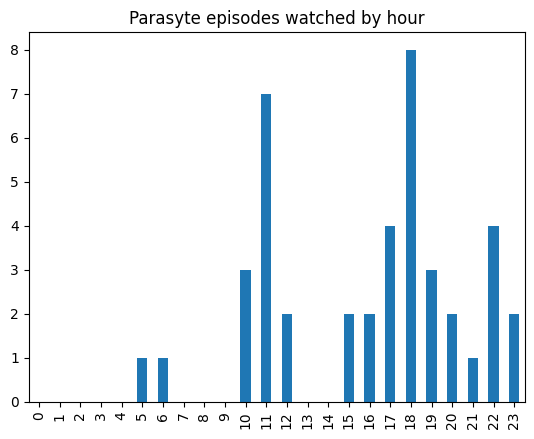

In [16]:
#Analysing data on the basis of hour
pr["Hour"]=pd.Categorical(pr["Hour"],categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)
pr_hour=pr["Hour"].value_counts()
pr_hour=pr_hour.sort_index()
pr_hour.plot(kind="bar", title="Parasyte episodes watched by hour")